Playing Around with the Iris Dataset
===
The goal here is to improve my understanding of Machine Learning / AI, and how to present work done using these tools. 

To that end, I use this file as a playground to mess about with different plotting methods, learning algorithms, and markdown tools.

Currently, everything here is 'in-progress', so don't trust the equations, etc.
<a id='toc'>

### Table of Contents:
1. <a href = '#ImportEtc'> Import Packages, Load Data, & Set Global Variables </a>
2. <a href = '#ExploratoryAnalysis'> Exploratory Analysis </a><br>
2.1 [What's In This Dataset?](#WhatsIn) </a>
3. Lorem Ipsum


<Insert a picture here>
<a id='ImportEtc'></a>

## 1. Import Packages, Load Data, & Set Global Variables 
<a href='#toc'> Table of Contents </a>

In [1]:
import numpy as np
import matplotlib
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import scipy as sp
import sklearn
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
m = X.shape[0]
# Turn X into a design matrix
X = np.hstack((np.ones((m, 1)), X))
n = X.shape[1]

matplotlib.rcParams['figure.figsize'] = (15, 6) # Sets global figure size

<a id='ExploratoryAnalysis'></a>

# 2. Exploratory Analysis
<a href='#toc'> Table of Contents </a> <a id='WhatsIn'></a>

### 2.1 - What's in this dataset?

In [11]:
print(u'\u2023'+" We have " + str(X.shape[0]) + " data points." +"\n")
print(u'\u2023'+" The features we have with are:")
for k in range(len(iris.feature_names)):
    s = (''.join(iris.feature_names[k])).split()
    if k % 2 == 0:
        print('  ' + u'\u2022', s[0].title(), s[1].title(), s[2])
    else:
        print('  ' + u'\u2022', s[0].title(), s[1].title(), ' ' + s[2])

‣ We have 150 data points.

‣ The features we have with are:
  • Sepal Length (cm)
  • Sepal Width  (cm)
  • Petal Length (cm)
  • Petal Width  (cm)


In [15]:
colors = ['red', 'green', 'blue']
classes = [name.title() for name in iris.target_names]
print('\n' + u'\u2023 '+"There are " + str(len(iris.target_names)) + " classes: ")
for k in range(len(classes)):
    print('  ' + u'\u2022', classes[k])
#print("\n"+ u'\u2023'+ " When we plot them...")
#for i in range(3):
#    print('  ' + u'\u2022 ' + iris.target_names[i].title() + " will be colored " + colors[i] + ".")


‣ There are 3 classes: 
  • Setosa
  • Versicolor
  • Virginica


### 2.2 - Plotting the Data
Let's plot
> Sepal Length vs Sepal Width

> Petal Length vs Petal Width

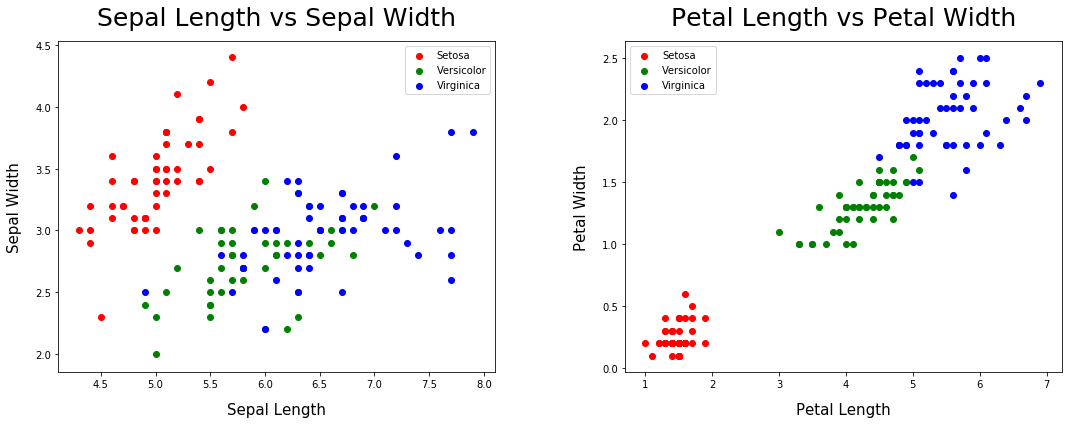

In [4]:
fig, (ax1, ax2) = plt.subplots(1,2)
# Annotate Figure
ax1.set_title("Sepal Length vs Sepal Width", fontsize = 25, y = 1.03)
ax1.set_xlabel("Sepal Length", labelpad=13, fontsize=15)
ax1.set_ylabel("Sepal Width", labelpad=13, fontsize=15)
ax2.set_title("Petal Length vs Petal Width", fontsize = 25, y = 1.03)
ax2.set_xlabel("Petal Length", labelpad=13, fontsize=15)
ax2.set_ylabel("Petal Width", labelpad=13, fontsize=15)

# Prep data
setosa = np.argwhere(y==0)
versicolor = np.argwhere(y==1)
virginica = np.argwhere(y==2)
colors = ['red', 'green', 'blue']

# Plot Sepal Length vs Sepal Width
ax1.scatter(X[setosa, 1], X[setosa, 2], c = 'r', label = 'Setosa')
ax1.scatter(X[versicolor, 1], X[versicolor, 2], c = 'g', label = 'Versicolor')
ax1.scatter(X[virginica, 1], X[virginica, 2], c = 'b', label = 'Virginica')
ax1.legend()

# Plot Petal Length vs Petal Width
ax2.scatter(X[setosa, 3], X[setosa, 4], c = 'r', label = 'Setosa')
ax2.scatter(X[versicolor, 3], X[versicolor, 4], c = 'g', label = 'Versicolor')
ax2.scatter(X[virginica, 3], X[virginica, 4], c = 'b', label = 'Virginica')
ax2.legend()

plt.tight_layout(w_pad=7.5)
plt.show()

# 3. Warming-Up with a Softmax Classifier (Multiclass Logistic Regression)

This is essentially a 2-layer MLP, with 4 input units and 3 output units:

#### Notes on the Upcoming Math

- The superscript $(i\,)$'s represent row/example number, and are 1-indexed. All subscripts are 0-indexed.<br><br>
- $\Theta$ is a matrix where $\Theta_{kj}$ refers to the $j^{th}$ element of the parameter/weight vector for the $k^{th}$ classifier - $\Theta$ has a row for each class.<br><br>
- $h_\Theta(x^{(i)})_k$ refers to the result of computing the hypothesis function for the $k^{th}$ classifier on the $i^{th}$ training example.
    - Precisely, this is the probability that the $i^{th}$ example belongs to the $k^{th}$ class.<br><br>
- Each element $y^{(i)}$ of the 'ground truth' vector '$y$' has been expanded into it's own vector, such that the $(y^{(i)})^{th}$ element is 1, and the others are 0.
    - For example:<br><br>
If $y^{(i)} = 2$, we transform $y^{(i)}$ into $\begin{bmatrix}0 & 1 & 0 \end{bmatrix}$ <br><br>
- We will use the classic "Cross-Entropy" loss function, and batch gradient descent.<br><br>
- Following convention, we do not apply regularization to the bias terms.<br>



#### Hypothesis Function:

$$ h_\Theta(x^{(i)})_k = g(\Theta_{k0}x_0^{(i)} + \Theta_{k1}x_1^{(i)} +\ ...\ + \Theta_{kn}x_n^{(i)}),\,\textrm{where}\ g(z) = \frac{1}{1 + e^{-z}}$$

#### Softmax Cost Function, with Regularization:<br>

$$ J(\Theta) = -\frac{1}{m}\sum_{i = 1}^{m} \left[ y^{(i)}\textrm{log}\left(h_{\Theta}(x^{(i)})\right)\,+
\,(1 - y^{(i)})\,\textrm{log}\left(1 - h_{\Theta}(x^{(i)})\right)\right] +
\frac{\lambda}{2m}\sum_{j = 1}^{n}\Theta_j^2$$

#### Gradient Descent Step, with Regularization: 
$$ \Theta_0 =\  \Theta_0 - \alpha\frac{1}{m}\sum_{i=1}^{m} \left(h_{\Theta}(x^{(i)}) - y^{(i)}\right)x_0^{(i)} $$

$$ \Theta_j =\,\Theta_j - \alpha\frac{1}{m}\sum_{i=1}^{m}\left[\left(h_{\Theta}(x^{(i)}) - y^{(i)}\right)x_j^{(i)}\right] + \frac{\lambda}{m}\Theta_j, \textrm{ for }\ j > 0.$$

## Vectorized Logistic Regression

Vectorizing attempts to replace for-loops and sums with dot-products to improve calculation efficiency.

###### Let's first remember that:
- We have $m$ total examples/datapoints, where $m = 150$
- We have $n$ features, where $n = 5$
    - Four features from the data, and one from a prepended column of 1's (that is, $x_0$) to account for bias terms.
- Thus, our input matrix $X$ is of dimension $m\times n$
- Our vector of true labels $y$ is of dimension $m\times 1$
- Our parameters $\Theta$ are contained in an $n\times 1$ vector

#### Hypothesis Function:

$$h_\Theta(X) = g(\Theta^TX),\,\textrm{where}\ g(z) = \frac{1}{1 + e^{-z}} \textrm{ is performed element-wise.}$$

<Describing how dimensions work out: $\Theta \textrm{ is }n\times 1 \textrm{, and X is } n\times m\textrm{, so }h_\Theta(X) \textrm{ is an } m\times 1 \textrm{ vector}$>

#### Logistic Regression Cost Function, with Regularization:<br>

$$J(\Theta) = -\frac{1}{m}\left[ y^T\textrm{log}\left(h_{\Theta}(X)\right)\,+ 
\,(1 - y)^T\,\textrm{log}\left(1 - h_{\Theta}(X)\right)\right] +
\frac{\lambda}{2m}\left(\Theta^T\Theta\right)$$

#### Gradient Descent Step, with Regularization: 
First, $$\Theta =\,\Theta - \alpha\frac{1}{m}\left[X^T\left(h_{\Theta}(X) - y\right)\right]$$<br>
Then, $$\Theta_{c} = \Theta_{c} - \,\alpha\frac{\lambda}{m}\Theta_{c}\,\textrm{ where }c\textrm{ represents the second through last columns.}$$

In [ ]:
def costLR(theta, X, y, rlambda):
     J = -1/m * (np.dot(np.transpose(y)))
def gradientLR(theta, X, y, rlambda):
    

(Some text planned for when I implement a 4-layer mlp)

There are 4 input units (one for each feature of the data), 5 units in each of the 2 hidden layers, and 3 output units (one for each class in the dataset).

Given an input example, each of the three output units will produce a real number $\in \left[0, 1\right]$, which together sum to 1.<br>Thus, we can interpret each output value as a probability: the probability that the input belongs to the class associated with the responsible output unit.